In [1]:
import os
import rootpath
import sys
sys.path.append(rootpath.detect())

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from analysis_utilities import load_result, format_figures, PATH_TO_PROCESSED_DSAF_RESULTS, PATH_TO_PROCESSED_PAREGO_RESULTS 
from analysis_utilities import Styles, Symbols, save_fig
from testsuite.utilities import Pareto_split
from testsuite.analysis_tools import get_igd_refpoint_dict, strip_problem_names

In [4]:
def plot_results_stage(result_dsaf, result_parego, stage=100, repeat=25):
    
    D_rp = get_igd_refpoint_dict()
    P = D_rp[f'wfg{result_dsaf.n_prob}_{result_dsaf.n_obj}obj_{result_dsaf.n_dim}dim']
    
    fig = plt.figure(figsize=[(4/5)*3, 4])
    fig_ax = fig.gca()
    
    fig_ax.axis("scaled")
    fig_ax.set_xlabel(Symbols.function_n(1))
    fig_ax.set_ylabel(Symbols.function_n(2))
    
    
    # plot Pareto front
    fig_ax.plot(*P[np.argsort(P[:, 0])].T, label=Symbols.Pareto_front, **Styles.line_Pareto_front, zorder=1)
    
    # plot directed solutions
    fig_ax.scatter(*np.asarray(Pareto_split(result_dsaf[repeat].y[10:stage])[0]).T, label = Symbols.approx_Pareto_front, **Styles.points_pareto_approx, zorder=4) 
    
    
    # plot parego solutions
    fig_ax.scatter(*np.asarray(Pareto_split(result_parego[repeat].y[10:stage])[0]).T, label = Symbols.parego, **Styles.points_parego, zorder=3) 
    
    # plot lhs samples
    fig_ax.scatter(*np.asarray(Pareto_split(result_dsaf[repeat].y[:10])[0]).T, label = Symbols.lhs_samples, **Styles.points_lhs, zorder=2) 
    
    # plot target
    fig_ax.scatter(*np.asarray(result_dsaf.targets[0]).T, label=Symbols.target, **Styles.points_target, zorder=5)
    fig_ax.legend(loc ="upper right")
    fig_ax.set_xlim(0, 3)
    fig_ax.set_ylim(0, 5) 
    return fig
    

In [5]:
format_figures()

In [6]:
med_result_name = 'wfg2_2obj_6dim_1.json'
dsaf_med_result = load_result(med_result_name, PATH_TO_PROCESSED_DSAF_RESULTS)
parego_med_result = load_result(med_result_name, PATH_TO_PROCESSED_PAREGO_RESULTS )

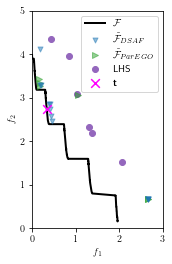

In [7]:
fig_00 = plot_results_stage(dsaf_med_result, parego_med_result, 150, repeat=11)
save_fig(fig_00, filename="fig_median_2obj_solution_comparisson_t1_parego")

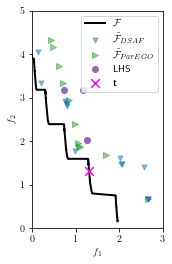

In [10]:
med_result_name = 'wfg2_2obj_6dim_4.json'
dsaf_med_result = load_result(med_result_name, PATH_TO_PROCESSED_DSAF_RESULTS)
parego_med_result = load_result(med_result_name, PATH_TO_PROCESSED_PAREGO_RESULTS )

fig_01 = plot_results_stage(dsaf_med_result, parego_med_result, 150, repeat = 1)
save_fig(fig_01, filename="fig_median_2obj_solution_comparisson_t2_parego")

In [9]:
# poor_result_name = 'wfg4_2obj_6dim_1.json'
# poor_result = load_result(poor_result_name)
# fig_10 = plot_results_stage(poor_result, stage=150, repeat=5)
# # save_fig(fig_10, filename="fig_mian_2obj_solution_comparisson_wfg4_t1_parego")

In [10]:
# poor_result_name = 'wfg4_2obj_6dim_4.json'
# poor_result = load_result(poor_result_name)
# fig_11 = plot_results_stage(poor_result, stage=150, repeat=3)
# save_fig(fig_11, filename="fig_mian_2obj_solution_comparisson_wfg4_t2")

In [11]:
# fig_10 = plot_results_stage(poor_result, 150)
# # save_fig(fig_10, filename="fig_mian_2obj_solution_comparisson_wfg4_t1")